In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("Customer Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()
#display the 1st rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
#displays all columns along with the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
#replace blank values with 0
#from here data cleaning starts

In [7]:
df["TotalCharges"]=df["TotalCharges"].astype("float")
#change the datatype of TotalCharges

In [9]:
df.isnull().sum()
#check if null values are present

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()
#checks for duplicate columns

0

In [11]:
df["customerID"].duplicated().sum()
#checks for duplicated values in primary key column

0

In [24]:
def conv(value):
    if value==1:
     return "yes"
    else:
     return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

#function to change the row values of a particular column
#form here data Processing starts

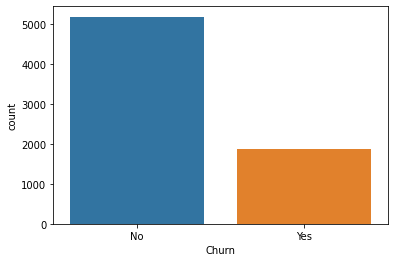

In [9]:
sns.countplot(x ='Churn',data=df)
plt.show()       
#using seaborn library to display the count of two values in Churn Column

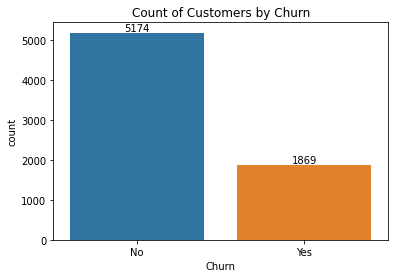

In [18]:
ax=sns.countplot(x ='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()     
#show values as well

In [16]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb  
#show the count by grouping of values 

,Churn
Churn,
No,5174
Yes,1869


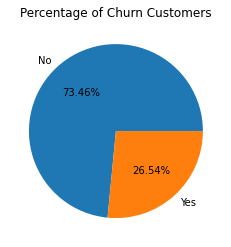

In [19]:
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churn Customers")
plt.show()

#showing in a pie chart

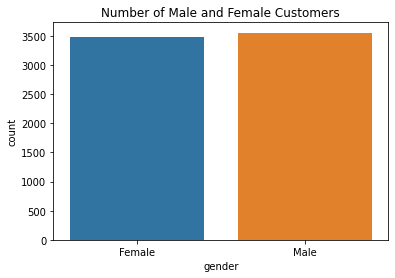

In [21]:
sns.countplot(x='gender',data=df)
plt.title('Number of Male and Female Customers')
plt.show()

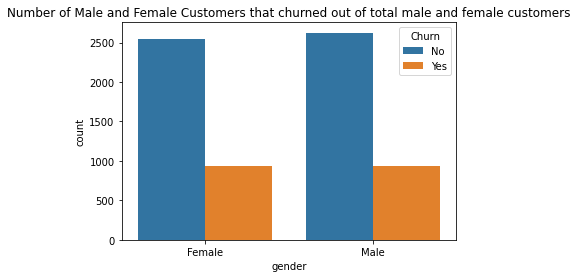

In [22]:
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Number of Male and Female Customers that churned out of total male and female customers')
plt.show()

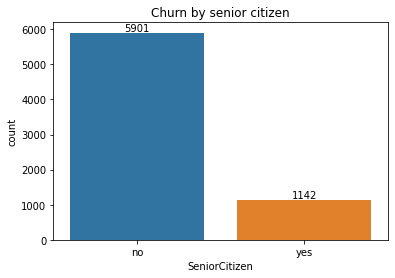

In [29]:
ab=sns.countplot(x='SeniorCitizen',data=df)
ab.bar_label(ab.containers[0])
plt.title("Churn by senior citizen")
plt.show()


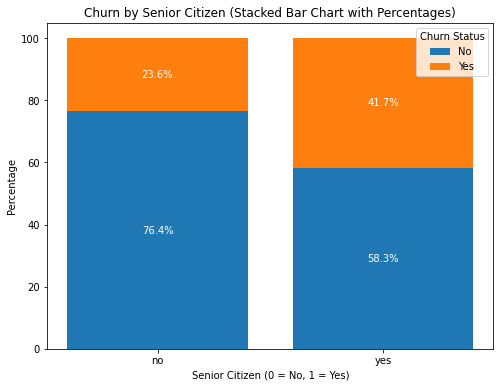

In [34]:
# Aggregating data
stacked_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculating percentages
percentages = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Setting up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Adjust column names based on unique Churn values
churn_values = stacked_data.columns.tolist()  # Get the churn categories
bar1 = ax.bar(stacked_data.index, percentages[churn_values[0]], label=f'{churn_values[0]}')
bar2 = ax.bar(stacked_data.index, percentages[churn_values[1]], bottom=percentages[churn_values[0]], label=f'{churn_values[1]}')

# Adding percentage labels
for i, (b1, b2) in enumerate(zip(bar1, bar2)):
    ax.text(b1.get_x() + b1.get_width() / 2, b1.get_height() / 2, 
            f"{percentages.iloc[i, 0]:.1f}%", ha="center", va="center", color="white")
    ax.text(b2.get_x() + b2.get_width() / 2, b1.get_height() + b2.get_height() / 2, 
            f"{percentages.iloc[i, 1]:.1f}%", ha="center", va="center", color="white")

# Adding titles and labels
ax.set_title("Churn by Senior Citizen (Stacked Bar Chart with Percentages)")
ax.set_xlabel("Senior Citizen (0 = No, 1 = Yes)")
ax.set_ylabel("Percentage")
ax.legend(title="Churn Status")

# Display the plot
plt.show()

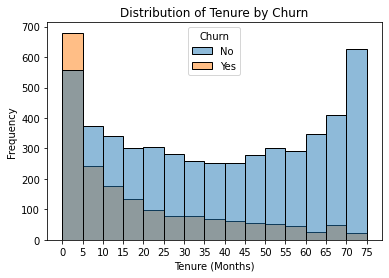

In [44]:
sns.histplot(
    x="tenure", 
    data=df, 
    hue="Churn", 
    binwidth=5,  # Adjust bin width for more distinct grouping
    kde=False    # Optional: Set to True for a smooth density curve
)
plt.title("Distribution of Tenure by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.xticks(range(0, df['tenure'].max() + 5, 5))  # Tick marks at intervals of 5
plt.show()

#people who used services for long time has stayed for a long time and those that didnt use didnt stay

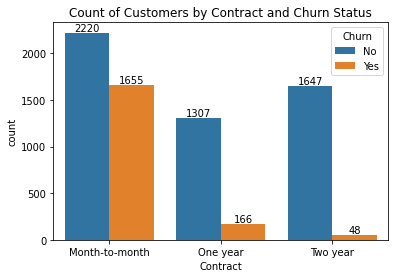

In [51]:
ab = sns.countplot(x='Contract', data=df, hue='Churn')

# Adding bar labels for both "Churned" and "Not Churned" categories
for container in ab.containers:
    ab.bar_label(container, label_type='edge')  # Label the bars on the edge for visibility

# Customize the title
plt.title("Count of Customers by Contract and Churn Status")

# Show the plot
plt.show()

#people who have a contract of month to month are churning out earl as compared to people who has year based contract

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

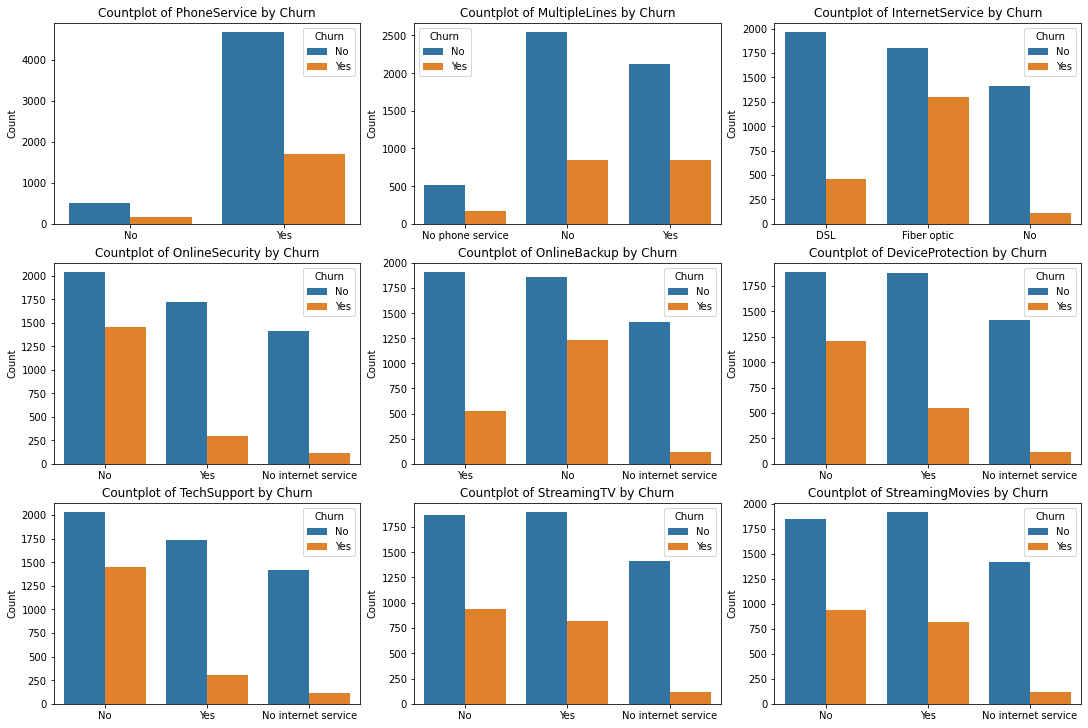

In [12]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of subplots
num_cols = 3  # Define columns in the grid
num_rows = -(-len(columns) // num_cols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate countplots
for i, col in enumerate(columns):
    sb.countplot(data=df, x=col,hue='Churn', ax=axes[i])  # Add hue='Churn'
    axes[i].set_title(f'Countplot of {col} by Churn')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

Churn is slightly higher for customers with MultipleLines = Yes compared to those without.

Fiber optic users show a higher churn rate compared to DSL or No InternetService.

Churn is notably high among customers with OnlineSecurity = No.

Churn is lower for customers with OnlineBackup = Yes, but higher among those with OnlineBackup = No.

churn is higher for customers without DeviceProtection.

Customers with TechSupport = No experience significantly higher churn.

Services such as TechSupport, OnlineSecurity, and OnlineBackup appear to play a role in customer retention, as churn is notably lower for users who subscribe to these services.

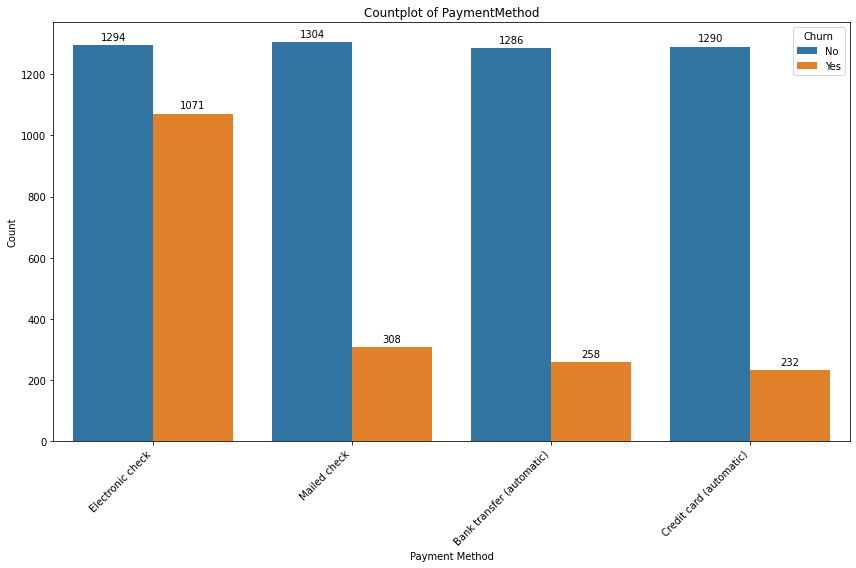

In [23]:
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Countplot with hue
ab = sb.countplot(x='PaymentMethod', data=df, hue='Churn')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right
plt.title('Countplot of PaymentMethod')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Add data labels
for container in ab.containers:
    ab.bar_label(container, fmt='%d', label_type='edge', padding=3)  # Add counts to each bar

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

The plot shows that Electronic Check has the highest churn rate compared to other payment methods, indicating possible dissatisfaction with this option